In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import pprint
import seaborn as sns

# Pre Processing #

First we will look at the data, then decide what to do with certain categories.

Everything we do to the test set we also do to the training set, but only based on what we've seen in the test set.

One key theme is that many of the models we have learned involve / assume linear data, so many of the numeric things we will have to linearise / take the log of

In [59]:
test_dataset = pd.read_csv('test_dataset.csv')
train_dataset = pd.read_csv('train_dataset.csv')

train_X = train_dataset.drop(columns=['imdb_score_binned'])
train_y = train_dataset['imdb_score_binned']

pd.set_option('display.max_columns', None)

In [60]:
train_y.value_counts()

imdb_score_binned
2    1839
3     777
1     235
4     129
0      24
Name: count, dtype: int64

For the ones where it is 0, what do they have in common. This is a hard class to classify

In [61]:
zeros_df = train_dataset[train_dataset['imdb_score_binned'] == 0]
zeros_df.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,1340.333333,74.125000,95.166667,143.416667,308.375000,787.791667,1.398697e+07,27364.708333,2110.958333,1.00000,273.458333,2002.708333,443.208333,3000.958333,0.000779,0.0
std,883.772677,50.053287,11.343133,242.636589,235.265772,523.367273,1.645435e+07,23190.334639,1439.219096,1.47442,286.508818,6.003471,260.326881,12575.795079,0.000423,0.0
min,25.000000,12.000000,76.000000,0.000000,0.000000,117.000000,3.067150e+05,2724.000000,286.000000,0.00000,28.000000,1986.000000,12.000000,0.000000,0.000300,0.0
25%,453.000000,30.250000,88.750000,15.000000,94.500000,565.500000,4.917834e+06,7495.000000,1068.000000,0.00000,62.000000,2000.750000,275.000000,0.000000,0.000525,0.0
50%,1530.000000,59.000000,94.500000,70.000000,244.000000,739.500000,8.246158e+06,20905.500000,1927.000000,0.00000,200.500000,2004.500000,412.000000,301.000000,0.000600,0.0
75%,2077.000000,115.750000,98.250000,115.750000,454.500000,902.250000,1.750562e+07,40968.250000,2786.500000,2.00000,391.750000,2006.000000,624.000000,813.750000,0.000976,0.0
max,2610.000000,174.000000,121.000000,892.000000,782.000000,3000.000000,7.300094e+07,74945.000000,6539.000000,6.00000,1308.000000,2011.000000,869.000000,62000.000000,0.002251,0.0


In [62]:
zeros_df

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
24,25,Dave Borthwick,31,77,3,593,Kylie Minogue,787,7382993,Adventure|Animation|Comedy|Family|Fantasy,Jimmy Fallon,Doogal,3851,2185,Jon Stewart,0,diamond|lava|magic|mountain|sorcerer,114,English,USA,G,2006,690,346,[-2.83997180e-03 3.62726132e-05 2.84734019e-...,0.000600,0
71,72,Steve Gomer,24,76,9,47,Kyla Pratt,595,11144518,Adventure|Family,Trevor Morgan,Barney's Great Adventure,2724,1139,Shirley Douglas,0,apostrophe in title|critically bashed|hit on t...,53,English,Canada,G,1998,417,436,[ 3.15951445e-04 7.57367059e-04 -6.76112249e-...,0.000375,0
162,163,Uwe Boll,148,94,892,81,Darren Shahlavi,310,5132655,Horror|Sci-Fi,Catherine Lough Haggquist,Alone in the Dark,37626,838,Karin Konoval,0,artifact|creature|darkness|demon|museum,521,English,Canada,R,2005,294,1000,[-0.00410943 0.00340693 -0.00078941 0.000157...,0.000600,0
331,332,Roger Christian,174,119,64,41,Michael Byrne,743,21471685,Action|Adventure|Sci-Fi,Richard Tyson,Battlefield Earth,65464,971,John Topor,0,alien|bad acting|pulp fiction|resistance fight...,1308,English,USA,PG-13,2000,117,0,[-1.4395472e-03 -8.5001532e-04 8.4308139e-04 ...,0.000450,0
359,360,Alex Zamm,12,95,43,611,Raquel Welch,1000,306715,Comedy,Taylor Negron,Chairman of the Board,5143,5213,Larry Miller,1,box office flop|company|invention|roommate|surfer,62,English,USA,PG-13,1998,788,724,[-3.05216201e-03 2.74869544e-03 -1.58773502e-...,0.000525,0
443,444,Jim Goddard,21,97,3,161,Paul Freeman,400,2315683,Adventure|Crime|Drama|Romance,Victor Wong,Shanghai Surprise,4081,805,Clyde Kusatsu,0,china|missionary|opium|villain|year 1937,28,English,UK,PG-13,1986,193,154,[-7.4637803e-04 2.3084809e-04 5.0306506e-04 ...,0.000600,0
455,456,Preston A. Whitmore II,25,95,17,255,Wayne Brady,592,7009668,Action|Sport,Wesley Jonathan,Crossover,8707,2000,Eva Marcille,6,african american|basketball|basketball movie|c...,36,English,USA,PG-13,2006,378,244,[ 1.34696648e-03 5.84622961e-04 1.19323924e-...,0.000450,0
461,462,Bob Clark,32,88,84,177,Vanessa Angel,650,9109322,Comedy|Family|Sci-Fi,Scott Baio,Superbabies: Baby Geniuses 2,25371,1343,Peter Wingfield,3,computer|good versus evil|mind control|science...,129,English,Germany,PG,2004,384,0,[-2.2005856e-03 7.7630125e-04 -1.6304254e-04 ...,0.000600,0
680,681,Joseph Sargent,80,92,114,434,Mario Van Peebles,912,20763013,Adventure|Horror|Thriller,Judith Barsi,Jaws: The Revenge,30840,2355,Lynn Whitfield,0,banana boat|boat|christmas|sea|shark,383,English,USA,PG-13,1987,535,0,[-3.4544494e-03 1.5026402e-03 -4.5010704e-04 ...,0.000450,0
1138,1139,Lawrence Guterman,78,94,6,227,Traylor Howard,490,17010646,Comedy|Family|Fantasy,Jamie Kennedy,Son of the Mask,40751,1195,Ben Stein,0,baby|cartoon on tv|cartoonist|dog|mask,239,English,USA,PG,2005,294,881,[-3.4722264e-03 1.7927631e-03 -1.5056618e-03 ...,0.000525,0


Later on I will try to synthetically oversample the Zero such that they match at least class 4 which has 129 samples

In [63]:
train_X.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
count,3004.00000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1502.50000,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739
std,867.32443,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183
min,1.00000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300
25%,751.75000,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825
50%,1502.50000,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426
75%,2253.25000,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401
max,3004.00000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354


Handling null values. From Ed it seems this one is the one with language == null

### Null Values ###

In [64]:
train_X.isnull().sum()

id                           0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     1
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
title_embedding              0
average_degree_centrality    0
dtype: int64

There is no null value in the test dataset, so I will go in to manually fix it

In [65]:
train_X[train_X['language'].isnull()]

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality
2787,2788,Ron Fricke,115,102,330,0,Balinese Tari Legong Dancers,48,2601847,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,48,Puti Sri Candra Dewi,0,hall of mirrors|mont saint michel france|palac...,69,NaN,USA,PG-13,2011,0,26000,[-1.7939140e-04 1.7596362e-03 -8.5148757e-05 ...,0.0003


### Language ###

In [66]:
train_X['language'].value_counts()

language
English       2872
French          32
Spanish         19
Mandarin         9
Japanese         9
German           9
Italian          5
Cantonese        5
Korean           4
Portuguese       4
Hindi            3
Norwegian        3
Dutch            3
Danish           3
Aboriginal       2
Thai             2
Indonesian       2
Dari             2
Persian          2
Kazakh           1
Maya             1
Aramaic          1
Filipino         1
Bosnian          1
Czech            1
Zulu             1
Vietnamese       1
Hungarian        1
Hebrew           1
Mongolian        1
Romanian         1
Arabic           1
Name: count, dtype: int64

Some research online reveals it is shot in 25 countries, that is why the language is hard to define. However, each language and other having its own category might really be useless, especially considering the fact that there aren't many non-english films anyway (e.g. a single category for 'Norwegian' would be useless). Instead I will create a category for English or Non-English. Assuming the test data is distributed similarly, individual categories for each language wouldn't make much sense either

In [67]:
train_X['English'] = train_X['language'].map(lambda x: 1 if (x == 'English') else 0)
test_dataset['English'] = test_dataset['language'].map(lambda x: 1 if (x == 'English') else 0)

### Country ###

In [68]:
train_X['country'].value_counts()

country
USA               2382
UK                 255
France              86
Germany             61
Canada              46
Australia           32
Spain               21
Japan               12
New Zealand         10
China                9
Hong Kong            9
Italy                8
South Korea          7
Ireland              6
Mexico               6
Denmark              6
Brazil               4
Thailand             3
South Africa         3
Argentina            3
Iran                 3
Netherlands          3
India                3
Norway               3
Taiwan               2
Czech Republic       2
Russia               2
Romania              2
Hungary              2
Colombia             1
Israel               1
West Germany         1
Official site        1
Afghanistan          1
Aruba                1
Chile                1
Finland              1
Iceland              1
Poland               1
Belgium              1
New Line             1
Indonesia            1
Name: count, dtype: int64

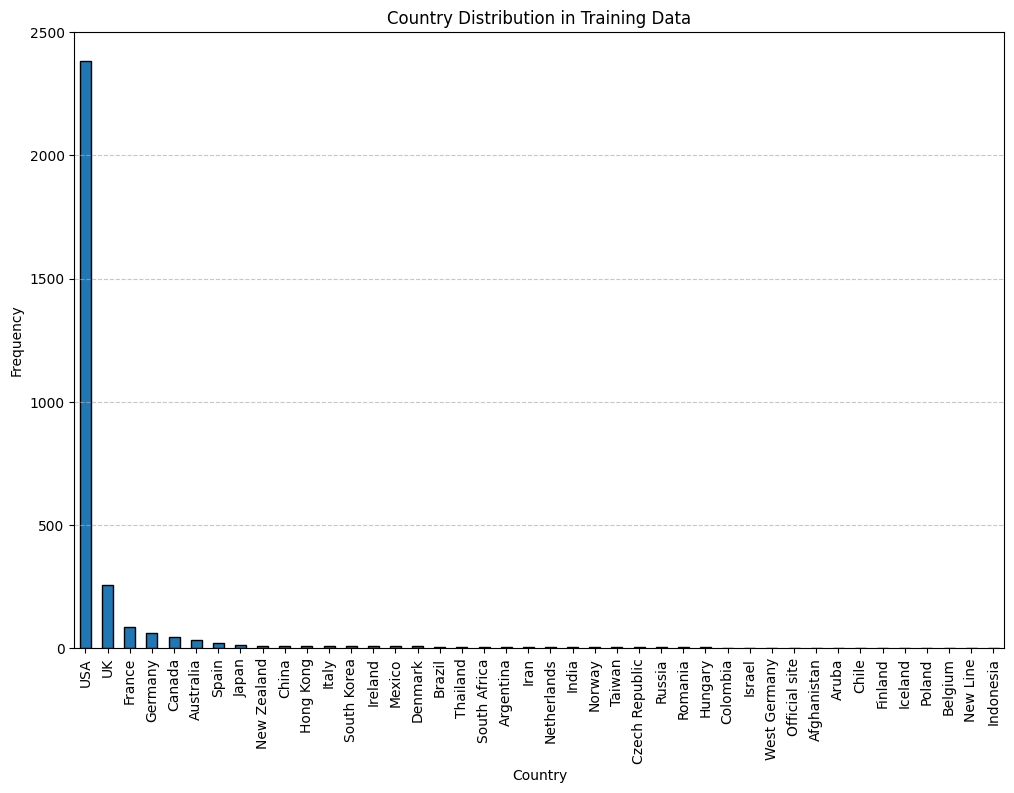

In [69]:
country_counts = train_X['country'].value_counts()

plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', edgecolor='black')
plt.title('Country Distribution in Training Data')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
countries = ['USA', 'UK']

for country in countries:
    train_X[country] = train_X['country'].map(lambda x: 1 if (x == country) else 0)
    test_dataset[country] = test_dataset['country'].map(lambda x: 1 if (x == country) else 0)

### Content Rating ###

In [71]:
train_X['content_rating'].value_counts()

content_rating
R            1362
PG-13        1039
PG            458
G              68
Not Rated      27
Unrated        19
Approved       14
X               9
NC-17           3
M               2
Passed          2
GP              1
Name: count, dtype: int64

I will join Not Rated and Unrated into their own category.

After some research online:

https://rating-system.fandom.com/wiki/GP PG replaced GP, and GP replaced M, hence we can group these into the same rating (using PG).

https://movies.stackexchange.com/questions/65430/what-are-the-meanings-of-the-terms-passed-and-approved-with-regards-to-a-mov
Approved and passed seem to be the same too 

https://rating-system.fandom.com/wiki/X_(MPAA) and X was replaced by NC-17

In [72]:
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'PG' if (x == 'GP' or x == 'M') else x)
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'Unrated' if (x == 'Not Rated' or x == 'Passed' or x == 'Approved') else x)
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'NC-17' if (x == 'X') else x)

test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'PG' if (x == 'GP' or x == 'M') else x)
test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'Unrated' if (x == 'Not Rated' or x == 'Passed' or x == 'Approved') else x)
test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'NC-17' if (x == 'X') else x)

now one hot encode them

In [73]:
ratings = list(train_X['content_rating'].unique())

for rating in ratings:
    train_X[rating] = train_X['content_rating'].map(lambda x: 1 if (x == rating) else 0)
    test_dataset[rating] = test_dataset['content_rating'].map(lambda x: 1 if (x == rating) else 0)

### Director Degree Centrality ###

Similar to average_degree_centrality which measures the centrality of the film based on shared actors, we will create a new feature: director degree centrality. 

More specifically:

$$director\_degree\_centrality = (number\_of\_movies\_by\_director - 1) / (number\_of\_movies\_in\_the\_training\_set - 1)$$

We subtract 1 from the numerator to NOT count the self-connection. The denominator is adjsuted by 1 because the maximum possible connections without a self connection is now one less.

In [74]:
director_counts_dict = train_X['director_name'].value_counts().to_dict()
number_of_movies = train_X.shape[0]

train_X['director_degree_centrality'] = train_X['director_name'].map(lambda x: (director_counts_dict.get(x) - 1) / (number_of_movies - 1))
test_dataset['director_degree_centrality'] = test_dataset['director_name'].map(lambda x: max(0, (director_counts_dict.get(x, 0) - 1) / (number_of_movies - 1)))

### importing pre-processed features ###

These come with MANY (100) dimensions, so we will have to apply some dimensionality reduction techniques on them

We have chosen NOT to use the one hot encoded actors, because the feature average degree centrality already uses this. We also don't include the directors because it's used in director centrality

In [75]:
test_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_1_name.npy'))

train_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_1_name.npy'))

test_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_2_name.npy'))

test_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_director_name.npy'))

test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

First I will try PCA dimensionality reduction to 3 dimensions. Later on, if the model fails to predict 0 as before, I will try finding the ones that have the highest correlation with score 0

### Dropping irrelevant columns ###

We can now drop all irrelevant columns that we have already processed into new columns or don't need.

In [76]:
train_X = train_X.drop(columns = ['id', 'director_name', 'actor_1_name', 'actor_2_name' , 'actor_3_name', 'genres', 'movie_title', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'])
test_dataset = test_dataset.drop(columns = ['id', 'director_name', 'actor_1_name', 'actor_2_name' , 'actor_3_name', 'genres', 'movie_title', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'])

### JOINING ###

In [77]:
train_X_joined = pd.concat([train_X, train_doc2vec_features_genre_df, train_doc2vec_features_plot_keywords_df,train_fasttext_title_embeddings_df], axis=1)
test_X_joined = pd.concat([test_dataset, test_doc2vec_features_genre_df, test_doc2vec_features_plot_keywords_df,test_fasttext_title_embeddings_df], axis=1)

Then also do it with the original fetures provided, to see if PCA makes a difference

In [78]:
test_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_1_name.npy'))

train_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_1_name.npy'))

test_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_2_name.npy'))

test_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_director_name.npy'))

test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

Using KMEANS to cluster genre, plot etc.

In [79]:
to_cluster = [(train_doc2vec_features_genre_df, test_doc2vec_features_genre_df, 'genre'), (train_doc2vec_features_plot_keywords_df, test_doc2vec_features_plot_keywords_df, 'plot_keywords'),(train_fasttext_title_embeddings_df,test_fasttext_title_embeddings_df, 'title')]

In [80]:
from sklearn.cluster import KMeans

new_train_features = pd.DataFrame()
new_test_features = pd.DataFrame()

for train_df, test_df, feature in to_cluster:

    kmeans=KMeans(n_clusters=5, random_state=999)
    kmeans.fit(train_df)

    new_train_features[feature + '_cluster'] = kmeans.labels_
    new_test_features[feature + '_cluster'] = kmeans.predict(test_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [81]:
train_X_joined_total = pd.concat([train_X, new_train_features], axis=1)
test_X_joined_total = pd.concat([test_dataset, new_test_features], axis=1)

In [82]:
test_X_joined_total

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,English,USA,UK,G,R,PG-13,Unrated,PG,NC-17,director_degree_centrality,genre_cluster,plot_keywords_cluster,title_cluster
0,27,118,14,400,2000,2246000,2302,3384,4,20,2015,769,0,0.000375,1,1,0,0,0,0,0,1,0,0.000000,0,0,4
1,339,141,0,404,749,47307550,104301,1948,4,269,2012,463,28000,0.002176,1,1,0,0,1,0,0,0,0,0.002331,3,0,4
2,78,95,89,388,963,37606,31836,2658,0,90,2009,654,0,0.000900,1,0,0,0,1,0,0,0,0,0.000000,2,0,4
3,226,117,0,818,15000,104054514,200359,16828,0,1009,2002,1000,0,0.003452,1,1,0,0,1,0,0,0,0,0.001665,3,2,3
4,97,104,38,690,801,3447339,29517,2667,7,79,2013,727,0,0.000450,1,1,0,0,1,0,0,0,0,0.000000,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,179,93,0,766,13000,17096053,134458,15716,2,640,1998,933,5000,0.002777,1,1,0,0,1,0,0,0,0,0.001665,3,4,4
748,393,105,335,911,3000,37516013,128629,8281,0,348,2012,3000,98000,0.001801,1,1,0,0,1,0,0,0,0,0.000000,0,1,4
749,55,117,133,249,687,20966644,29610,1665,0,94,1985,443,0,0.001126,1,0,1,0,0,0,1,0,0,0.000333,3,2,3
750,85,72,0,384,3000,47887943,11634,4480,0,58,2003,455,227,0.000825,1,1,0,1,0,0,0,0,0,0.000000,0,1,2


### Removing highly correlated data ###
So we can generalise better

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

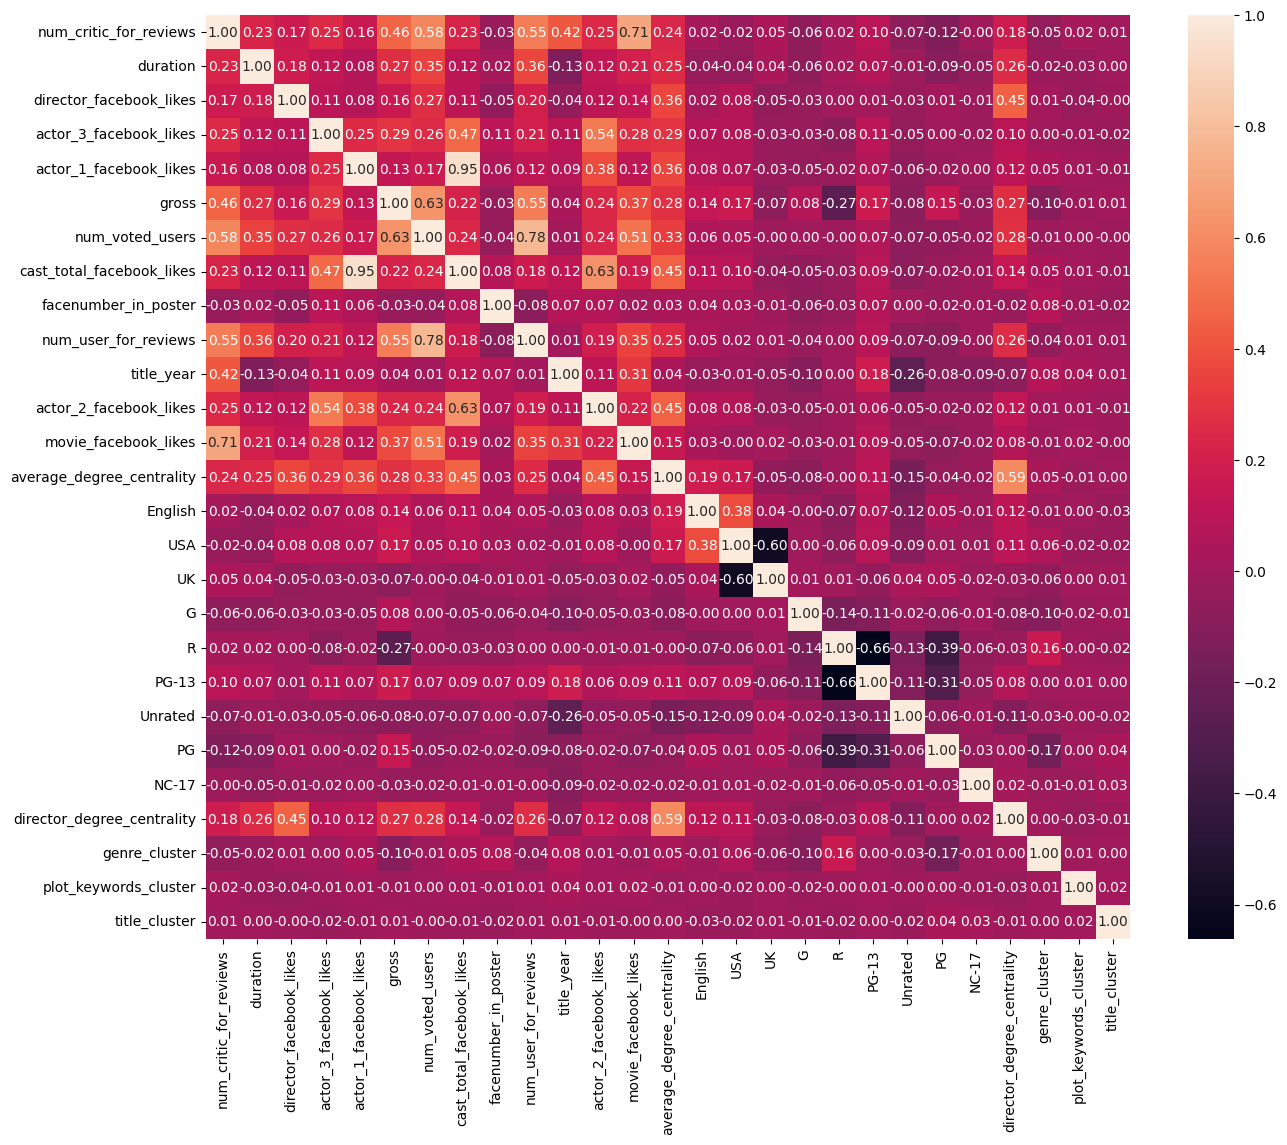

In [84]:
feature_correlations = train_X_joined_total.corr()
plt.figure(figsize=(15,12))
sns.heatmap(feature_correlations, annot=True, fmt=".2f", square=True)
plt.show()

In [85]:
train_X_joined_total = train_X_joined_total.drop(columns=['num_user_for_reviews', 'cast_total_facebook_likes', 'movie_facebook_likes'])
test_X_joined_total = test_X_joined_total.drop(columns=['num_user_for_reviews', 'cast_total_facebook_likes', 'movie_facebook_likes'])

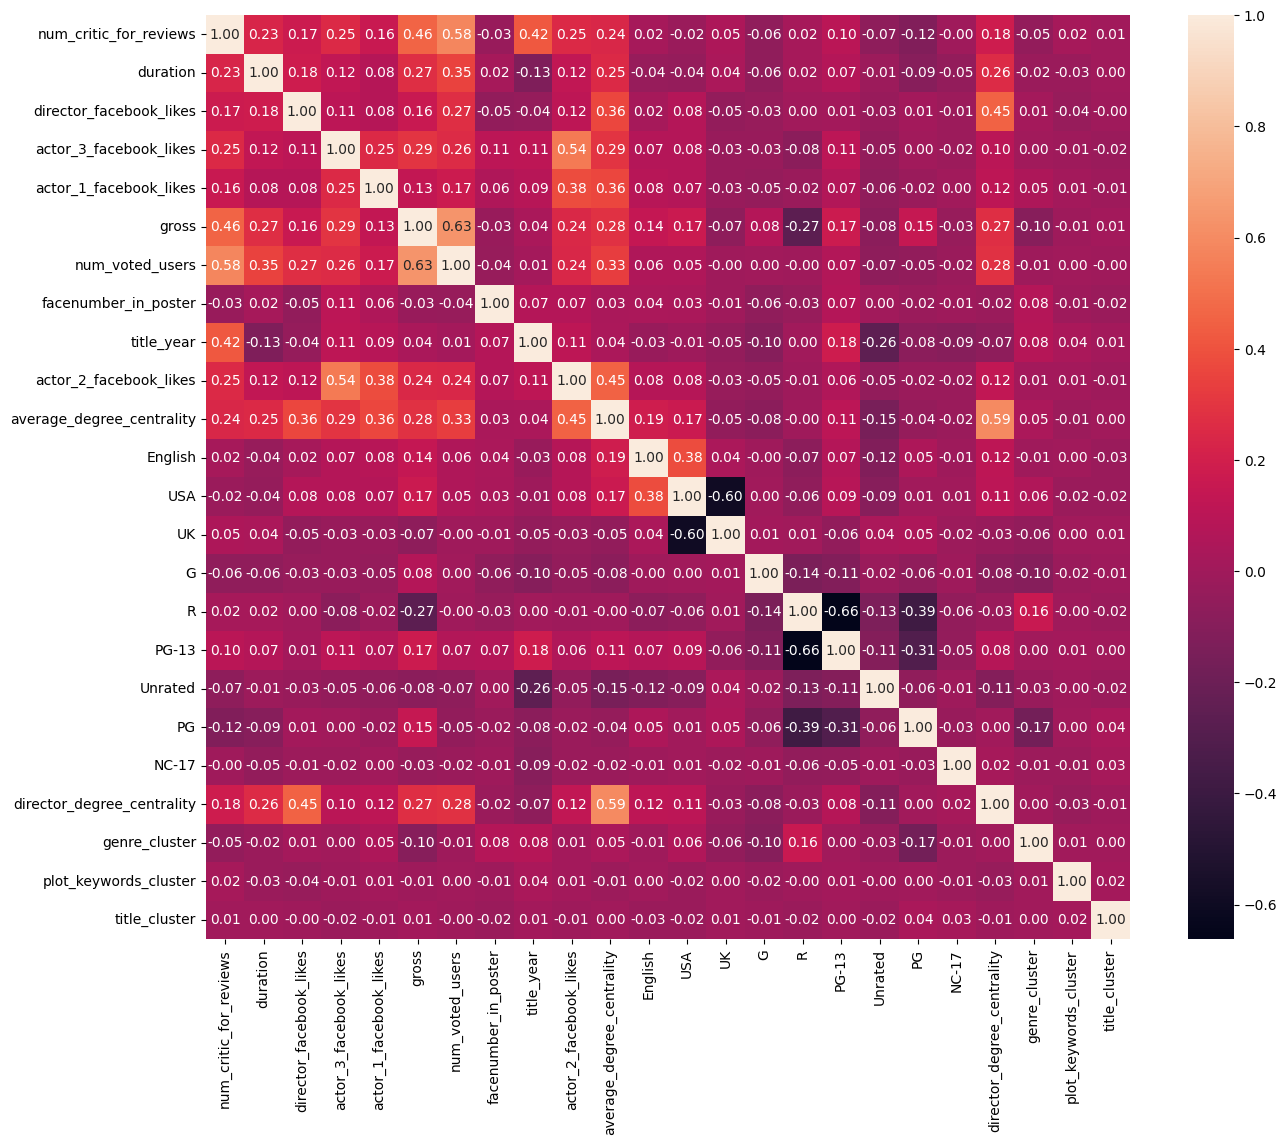

In [86]:

feature_correlations = train_X_joined_total.corr()
plt.figure(figsize=(15,12))
sns.heatmap(feature_correlations, annot=True, fmt=".2f", square=True)
plt.show()

There are no longer any SUPER highly correlated features!

### SMOTE for class 0 ###

Because we don't have enough samples for class 0, I will synthetically oversample them. My choice is to make it the SAME as the next smallest class. I will also base this in the 5 nearest neighbours

I will also synthetically oversample 1, because some models seem to not predict this at all

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={0: 75}, k_neighbors=5)

In [88]:
X_smote, y_smote = smote.fit_resample(train_X_joined_total, train_y)

In [89]:
y_smote.value_counts()

imdb_score_binned
2    1839
3     777
1     235
4     129
0      75
Name: count, dtype: int64

TO visualise this:

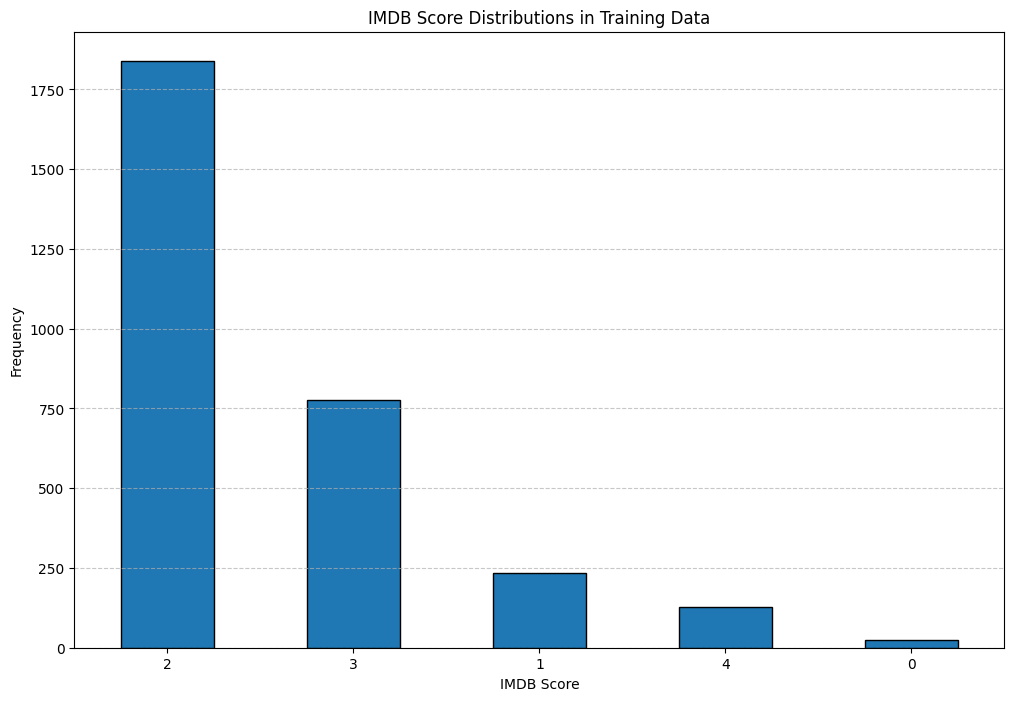

In [93]:
score_counts = train_y.value_counts()

plt.figure(figsize=(12, 8))
score_counts.plot(kind='bar', edgecolor='black')
plt.title('IMDB Score Distributions in Training Data')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import GridSearchCV

### Model 1: Random Forrest ###

In [216]:
for k in [23]:

    clf = RandomForestClassifier(random_state=99)

    print('\n--------------------------------------- mi   ------------------------------')
    pamater_grid = {'n_estimators': [100], 'class_weight': ['balanced', 'balanced_subsample', None], 'criterion':['gini', 'entropy'], 'max_depth': [10, 30, None], 'max_features': ['sqrt', 'log2', 20, None]}
    grid = GridSearchCV(clf, pamater_grid, verbose=3)
    grid.fit(X_smote, y_smote)

    print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.696 total time=   0.4s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.699 total time=   0.6s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.687 total time=   1.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.664 total time=   0.8s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=100;, score=0.722 total time=   0.6s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, n_estimators=100;, score=0.696 total time=   0.5s
[CV 2/5] END class_weight=balanced, criterion=gini,

KeyboardInterrupt: 

In [ ]:
clf = RandomForestClassifier(random_state=99)

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'n_estimators': [10, 50, 100], 'class_weight': [None], 'criterion':['entropy'], 'max_depth': [20, 30, 40], 'max_features': [5, 10, 20, None]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, n_estimators=10;, score=0.691 total time=   0.1s
[CV 2/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, n_estimators=10;, score=0.698 total time=   0.1s
[CV 3/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, n_estimators=10;, score=0.686 total time=   0.1s
[CV 4/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, n_estimators=10;, score=0.695 total time=   0.1s
[CV 5/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, n_estimators=10;, score=0.670 total time=   0.1s
[CV 1/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, n_estimators=50;, score=0.704 total time=   0.4s
[CV 2/5] END class_weight=None, criterion=entropy, max_depth=20, max_features=5, 

Evaluate this, with a test_train split

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=99)

In [218]:
clf = RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=10, max_features=10, n_estimators=100)
clf.fit(X_train_smote, y_train_smote)
predictions = clf.predict(X_test_smote)
print(classification_report(y_test_smote, predictions))

              precision    recall  f1-score   support

           0       0.75      0.45      0.56        20
           1       0.00      0.00      0.00        63
           2       0.75      0.96      0.84       572
           3       0.73      0.48      0.58       221
           4       0.95      0.49      0.65        41

    accuracy                           0.75       917
   macro avg       0.64      0.48      0.53       917
weighted avg       0.70      0.75      0.71       917



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [219]:
train_predict = clf.predict(X_train_smote)
print(classification_report(y_train_smote, train_predict))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       1.00      0.55      0.71       172
           2       0.90      1.00      0.95      1267
           3       1.00      0.89      0.94       556
           4       1.00      1.00      1.00        88

    accuracy                           0.93      2138
   macro avg       0.98      0.87      0.91      2138
weighted avg       0.94      0.93      0.93      2138



How well does it do on a random test where they are all actually not from the oversampled 0 component

In [220]:
X_train, X_test, y_train, y_test = train_test_split(train_X_joined_total, train_y, test_size=0.3, random_state=99)

In [37]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.88      0.40      0.55        70
           2       0.81      0.96      0.88       558
           3       0.81      0.64      0.72       216
           4       0.97      0.71      0.82        48

    accuracy                           0.82       902
   macro avg       0.89      0.64      0.73       902
weighted avg       0.83      0.82      0.81       902



Something to talk about here! Clearly there is some overfitting happening, because this performs poorly on the real data


In [38]:
predictions = pd.DataFrame(predictions)
predictions.value_counts()

2    658
3    172
4     35
1     32
0      5
Name: count, dtype: int64

making the individual predictions from this

In [44]:
clf = RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=20, max_features=10, n_estimators=50)
clf.fit(X_smote, y_smote)
predictions = clf.predict(test_X_joined_total)
create_csv(predictions, 'new_smote_rf')

### MODEL 2: KNN ###

This model will be simple, but of course we should apply standard scaling to all the features before applying it

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_smote_scaled = pd.DataFrame(scaler.fit_transform(X_smote))
X_smote_scaled.columns = X_smote.columns
test_X_joined_total_scaled = pd.DataFrame(scaler.transform(test_X_joined_total))
test_X_joined_total_scaled.columns = test_X_joined_total.columns

Removing the clusters because they do not apply anymore. They are categorical

In [85]:
X_smote_scaled = X_smote_scaled.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])
test_X_joined_total_scaled = test_X_joined_total_scaled.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])

In [41]:
clf = KNeighborsClassifier()

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'n_neighbors': [2, 5, 10, 20, 30, 40, 50], 'weights': ['distance', 'uniform']}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_scaled.values, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.595 total time=   0.0s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.580 total time=   0.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.609 total time=   0.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.596 total time=   0.0s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.615 total time=   0.0s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.582 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.564 total time=   0.0s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.595 total time=   0.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.588 total time=   0.0s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.557 total time=   0.0s
[CV 1/5] END ...n_neighbors=5, weights=distance;, sc

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.3, random_state=99)
clf = KNeighborsClassifier(weights='distance', n_neighbors=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        20
           1       0.20      0.02      0.03        63
           2       0.71      0.92      0.80       572
           3       0.56      0.36      0.44       221
           4       1.00      0.29      0.45        41

    accuracy                           0.69       917
   macro avg       0.69      0.42      0.48       917
weighted avg       0.65      0.69      0.64       917



In [168]:
train_predict = clf.predict(X_train)
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00      1267
           3       1.00      1.00      1.00       556
           4       1.00      1.00      1.00        88

    accuracy                           1.00      2138
   macro avg       1.00      1.00      1.00      2138
weighted avg       1.00      1.00      1.00      2138



While these are not great predictions, they are sufficiently different from the random forrest. This is good variety that is needed for our stacked model

### Linearising ###

For linear models, like linear SVM one of the main assumptions is that the data sccales linearly. We should probably apply some transformations!

In [94]:
X_smote.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3055.0,1.642111e+02,1.208615e+02,2.0000,7.500000e+01,1.360000e+02,2.220000e+02,8.130000e+02
duration,3055.0,1.098694e+02,2.181413e+01,37.0000,9.600000e+01,1.060000e+02,1.200000e+02,3.300000e+02
director_facebook_likes,3055.0,7.682841e+02,2.966881e+03,0.0000,1.000000e+01,6.400000e+01,2.340000e+02,2.300000e+04
actor_3_facebook_likes,3055.0,7.596622e+02,1.887220e+03,0.0000,1.895000e+02,4.290000e+02,6.805000e+02,2.300000e+04
actor_1_facebook_likes,3055.0,7.538809e+03,1.637484e+04,0.0000,7.210000e+02,1.000000e+03,1.200000e+04,6.400000e+05
gross,3055.0,5.122042e+07,6.802921e+07,162.0000,8.301882e+06,2.911359e+07,6.563844e+07,6.586723e+08
num_voted_users,3055.0,1.036625e+05,1.499149e+05,91.0000,1.888950e+04,5.295800e+04,1.263320e+05,1.689764e+06
facenumber_in_poster,3055.0,1.369558e+00,2.084320e+00,0.0000,0.000000e+00,1.000000e+00,2.000000e+00,4.300000e+01
title_year,3055.0,2.002745e+03,1.003762e+01,1929.0000,1.999000e+03,2.004000e+03,2.010000e+03,2.016000e+03
actor_2_facebook_likes,3055.0,1.966239e+03,4.616660e+03,0.0000,3.710000e+02,6.580000e+02,9.680000e+02,1.370000e+05


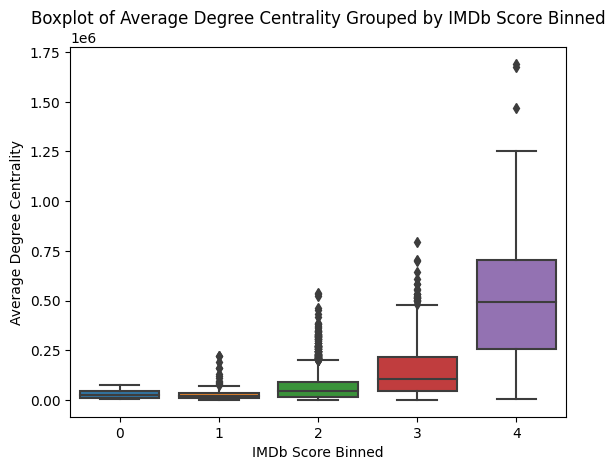

In [95]:
# Visualisation:

import seaborn as sns
import matplotlib.pyplot as plt

new_df = pd.concat([X_smote, y_smote], axis=1)

sns.boxplot(x='imdb_score_binned', y='num_voted_users', data=new_df)
plt.xlabel('IMDb Score Binned')
plt.ylabel('Average Degree Centrality')
plt.title('Boxplot of Average Degree Centrality Grouped by IMDb Score Binned')
plt.show()

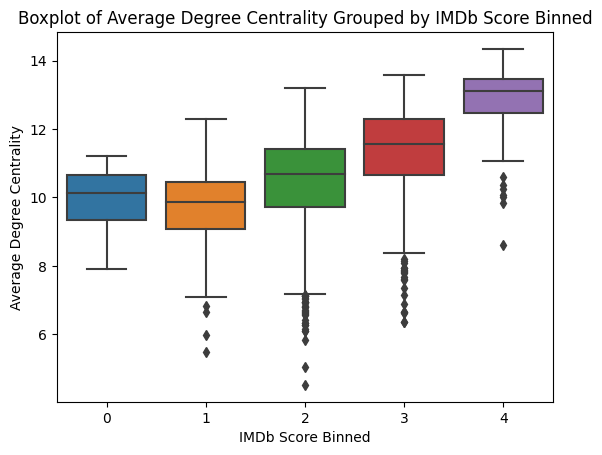

In [96]:
new_df['num_voted_users_logged'] = new_df['num_voted_users'].apply(np.log1p)

sns.boxplot(x='imdb_score_binned', y='num_voted_users_logged', data=new_df)
plt.xlabel('IMDb Score Binned')
plt.ylabel('Average Degree Centrality')
plt.title('Boxplot of Average Degree Centrality Grouped by IMDb Score Binned')
plt.show()

In [97]:
X_smote.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'average_degree_centrality', 'English', 'USA',
       'UK', 'G', 'R', 'PG-13', 'Unrated', 'PG', 'NC-17',
       'director_degree_centrality', 'genre_cluster', 'plot_keywords_cluster',
       'title_cluster'],
      dtype='object')

In [98]:
X_smote_linear = X_smote.copy()
X_test_linear = test_X_joined_total.copy()

X_smote_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']] = np.log1p(X_smote_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']])

X_test_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']] = np.log1p(X_test_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']])

I will also scale the degree centrality. I know this isn't linear, but I will first multiply it by 3000 (essentially back to the number of films in the trianing set) so that taking the log makes sense

In [99]:
X_smote_linear[['average_degree_centrality', 'director_degree_centrality']] = 3000 * (X_smote_linear[['average_degree_centrality', 'director_degree_centrality']])
X_test_linear[['average_degree_centrality', 'director_degree_centrality']] = 3000 * (X_test_linear[['average_degree_centrality', 'director_degree_centrality']])


In [100]:
X_smote_linear[['average_degree_centrality', 'director_degree_centrality']] = np.log1p(X_smote_linear[['average_degree_centrality', 'director_degree_centrality']])
X_test_linear[['average_degree_centrality', 'director_degree_centrality']] = np.log1p(X_test_linear[['average_degree_centrality', 'director_degree_centrality']])

In [101]:
X_smote_linear = X_smote_linear.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])
X_test_linear = X_test_linear.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

X_smote_linear = scaler.fit_transform(X_smote_linear)
X_test_linear = scaler.transform(X_test_linear)

In [103]:
from sklearn.svm import SVC

### Linear SVM ###

In [53]:
from sklearn.svm import SVC

clf = SVC()

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'kernel': ['linear'], 'max_iter': [5000], 'class_weight': [None, 'balanced'], 'C':[0.1, 0.5, 1, 5, 10]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_linear, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.1, class_weight=None, kernel=linear, max_iter=5000;, score=0.677 total time=   0.1s
[CV 2/5] END C=0.1, class_weight=None, kernel=linear, max_iter=5000;, score=0.706 total time=   0.1s
[CV 3/5] END C=0.1, class_weight=None, kernel=linear, max_iter=5000;, score=0.699 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight=None, kernel=linear, max_iter=5000;, score=0.696 total time=   0.1s
[CV 5/5] END C=0.1, class_weight=None, kernel=linear, max_iter=5000;, score=0.692 total time=   0.1s
[CV 1/5] END C=0.1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.479 total time=   0.2s
[CV 2/5] END C=0.1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.513 total time=   0.2s
[CV 3/5] END C=0.1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.506 total time=   0.3s
[CV 4/5] END C=0.1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.513 total time=   0.2s
[CV 5/5] END C=0.1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.527 total time=   0.2s
[CV 1/5] END C=0.5, class_weight=None, kernel=linear, max_iter=5000;, score=0.674 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.5, class_weight=None, kernel=linear, max_iter=5000;, score=0.712 total time=   0.2s
[CV 3/5] END C=0.5, class_weight=None, kernel=linear, max_iter=5000;, score=0.698 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.5, class_weight=None, kernel=linear, max_iter=5000;, score=0.704 total time=   0.2s
[CV 5/5] END C=0.5, class_weight=None, kernel=linear, max_iter=5000;, score=0.707 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.486 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.508 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.516 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.513 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.536 total time=   0.3s
[CV 1/5] END C=1, class_weight=None, kernel=linear, max_iter=5000;, score=0.678 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight=None, kernel=linear, max_iter=5000;, score=0.725 total time=   0.2s
[CV 3/5] END C=1, class_weight=None, kernel=linear, max_iter=5000;, score=0.695 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight=None, kernel=linear, max_iter=5000;, score=0.717 total time=   0.2s
[CV 5/5] END C=1, class_weight=None, kernel=linear, max_iter=5000;, score=0.699 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.492 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.523 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.521 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.503 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.548 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=5, class_weight=None, kernel=linear, max_iter=5000;, score=0.576 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=5, class_weight=None, kernel=linear, max_iter=5000;, score=0.651 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=5, class_weight=None, kernel=linear, max_iter=5000;, score=0.550 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=5, class_weight=None, kernel=linear, max_iter=5000;, score=0.661 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=5, class_weight=None, kernel=linear, max_iter=5000;, score=0.597 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.482 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.505 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.471 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.481 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=5, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.551 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, kernel=linear, max_iter=5000;, score=0.375 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, kernel=linear, max_iter=5000;, score=0.494 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, kernel=linear, max_iter=5000;, score=0.506 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, kernel=linear, max_iter=5000;, score=0.561 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, kernel=linear, max_iter=5000;, score=0.531 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.418 total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.471 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.421 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.553 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, kernel=linear, max_iter=5000;, score=0.422 total time=   0.4s
best cv score: 0.7027970652044468, with parameters {'C': 1, 'class_weight': None, 'kernel': 'linear', 'max_iter': 5000}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [57]:
clf = SVC()

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'kernel': ['linear'], 'max_iter': [500000], 'class_weight': [None], 'C':[0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_linear, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.677 total time=   0.5s
[CV 2/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.714 total time=   0.2s
[CV 3/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.699 total time=   0.2s
[CV 4/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.707 total time=   0.2s
[CV 5/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.705 total time=   0.2s
[CV 1/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.675 total time=   0.2s
[CV 2/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.714 total time=   0.3s
[CV 3/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.699 total time=   0.2s
[CV 4/5] END C=0.9, class_weight=None, 

Nice - now we just gotta evaluate it to see if it makes any different results from the others

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_linear, y_smote, test_size=0.3, random_state=99)
clf = SVC(C=1.1, class_weight=None, kernel='linear', max_iter=-1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65        49
           1       0.78      0.08      0.15        85
           2       0.71      0.94      0.81       558
           3       0.66      0.44      0.53       223
           4       0.78      0.55      0.65        38

    accuracy                           0.71       953
   macro avg       0.75      0.51      0.56       953
weighted avg       0.71      0.71      0.67       953



### Ada Boosted DT ###

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1)
dt2 = DecisionTreeClassifier(max_depth=2)

AdaModel = AdaBoostClassifier()

pamater_grid = {'base_estimator': [dt1], 'n_estimators': [10, 20, 5, 100, 500]}
grid = GridSearchCV(AdaModel, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10;, score=0.613 total time=   0.1s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10;, score=0.640 total time=   0.0s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10;, score=0.577 total time=   0.0s
[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10;, score=0.600 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10;, score=0.641 total time=   0.0s
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20;, score=0.613 total time=   0.1s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20;, score=0.627 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20;, score=0.294 total time=   0.1s
[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20;, score=0.613 total time=   0.1s
[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=20;, score=0.641 total time=   0.1s
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5;, score=0.621 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5;, score=0.648 total time=   0.0s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5;, score=0.605 total time=   0.0s
[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5;, score=0.601 total time=   0.0s
[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5;, score=0.646 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100;, score=0.613 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100;, score=0.312 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100;, score=0.429 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100;, score=0.304 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100;, score=0.641 total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500;, score=0.613 total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500;, score=0.289 total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500;, score=0.373 total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500;, score=0.346 total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500;, score=0.641 total time=   2.0s
best cv score: 0.624001843308428, with parameters {'base_estimator': DecisionTreeClassifier(max_depth=1), 'n_estimators': 5}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Not satisfied with these results. Will try logistic regression

In [93]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression ###

In [64]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

pamater_grid = {'penalty': ['l2'], 'max_iter': [10000], 'dual':[False], 'C':[0.1, 0.5, 1, 2, 5], 'class_weight': ['balanced', None], 'multi_class': ['ovr', 'multinomial']}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.400 total time=   0.2s
[CV 2/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.339 total time=   0.1s
[CV 3/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.296 total time=   0.1s
[CV 4/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.395 total time=   0.2s
[CV 5/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.372 total time=   0.2s
[CV 1/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.387 total time=   1.0s
[CV 2/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.362 total time=   0.7

In [66]:
pamater_grid = {'penalty': ['l2'], 'max_iter': [10000], 'dual':[False], 'C':[3, 4, 5, 6, 7, 10, 30], 'class_weight': [None], 'multi_class': ['ovr', 'multinomial']}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.637 total time=   0.2s
[CV 2/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.640 total time=   0.2s
[CV 3/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.641 total time=   0.2s
[CV 4/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.653 total time=   0.2s
[CV 5/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.639 total time=   0.3s
[CV 1/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.613 total time=   0.6s
[CV 2/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.624 total time=   0.5s
[CV 3/5] END C=3, class_weight=None, dual

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_linear, y_smote, test_size=0.3, random_state=99)
clf = LogisticRegression(C=5, dual=False, max_iter=10000, multi_class='ovr')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        49
           1       0.71      0.06      0.11        85
           2       0.70      0.96      0.81       558
           3       0.72      0.37      0.49       223
           4       0.80      0.53      0.63        38

    accuracy                           0.71       953
   macro avg       0.73      0.49      0.53       953
weighted avg       0.71      0.71      0.66       953



Classification report for C=100:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        20
           1       0.00      0.00      0.00        63
           2       0.71      0.96      0.82       572
           3       0.68      0.32      0.44       221
           4       0.86      0.59      0.70        41

    accuracy                           0.71       917
   macro avg       0.61      0.45      0.50       917
weighted avg       0.66      0.71      0.66       917



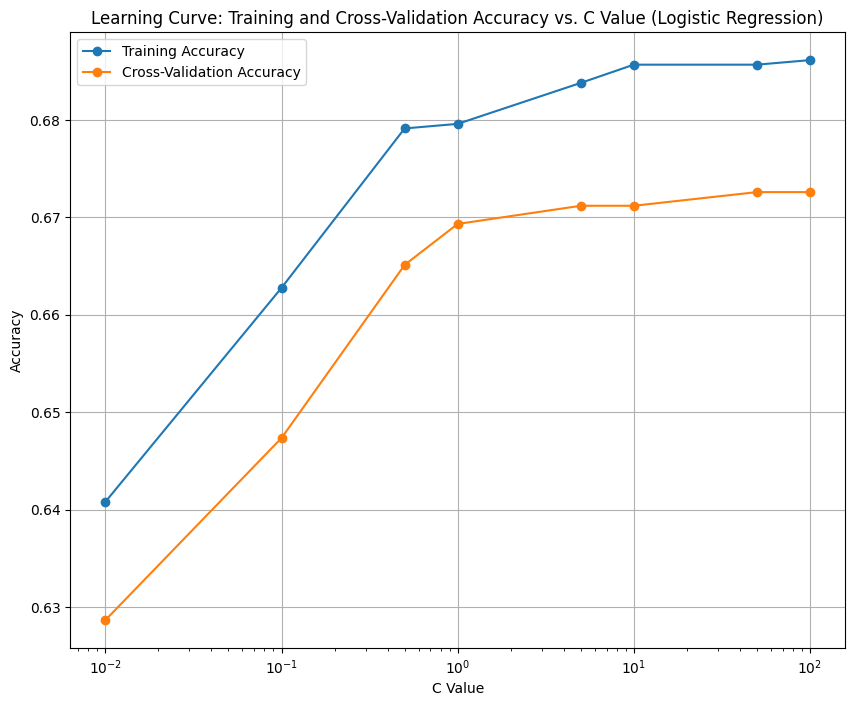

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_smote_linear, y_smote, test_size=0.3, random_state=99)

# Define the range of C values to evaluate
C_values = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

# Lists to store training and cross-validation accuracies
train_accuracies = []
cv_accuracies = []

# Evaluate the model for each value of C
for C in C_values:
    clf = LogisticRegression(C=C, dual=False, max_iter=10000, multi_class='ovr')
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Predict and calculate accuracy for training set
    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Calculate cross-validation accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy'))
    cv_accuracies.append(cv_accuracy)

# Print classification report for the last evaluated C value
print(f"Classification report for C={C_values[-1]}:")
test_predictions = clf.predict(X_test)
print(classification_report(y_test, test_predictions))

# Plot the learning curve
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, cv_accuracies, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Training and Cross-Validation Accuracy vs. C Value (Logistic Regression)')
plt.legend()
plt.xscale('log') 
plt.grid(True)
plt.show()


### ENSEMBLE STACKED MODEL ###

First I'll apply all the preprocessing steps necessary, then create a stacked model with these pipelines

In [112]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# firstly RF - nice already easy!
feature_selector = SelectKBest(score_func=mutual_info_classif, k=20)

pipelineRF = Pipeline([
    ('classifier', RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=20, max_features=10, n_estimators=50))
])

In [114]:
# knn
feature_selector = SelectKBest(score_func=mutual_info_classif, k=20)


columns_to_drop = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster']

preprocessor_knn = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)

pipelineKNN = Pipeline([
    ('preprocessor', preprocessor_knn),
    ('scale', StandardScaler()),
    ('classifier', KNeighborsClassifier(weights='distance', n_neighbors=20))
])

In [115]:
# svm
feature_selector = SelectKBest(score_func=mutual_info_classif, k=20)

columns_to_drop = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster']

columns_to_multiply = ['average_degree_centrality', 'director_degree_centrality']

columns_to_log = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'average_degree_centrality', 'director_degree_centrality']

def mult3000(X):
    return 3000 * X

log1p_transformer = FunctionTransformer(np.log1p)
mult3000_transformer = FunctionTransformer(mult3000)


preprocessor_svm = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop),
        ('mult3000', mult3000_transformer, columns_to_multiply),
        ('log1p', log1p_transformer, columns_to_log)
    ],
    remainder='passthrough'
)

pipelineSVM = Pipeline([
    ('preprocessor', preprocessor_svm),
    ('scale', StandardScaler()),
    ('classifier', SVC(C=1.1, class_weight=None, kernel='linear', max_iter=-1))
])

In [116]:
# logistic regression
feature_selector = SelectKBest(score_func=mutual_info_classif, k=20)

columns_to_drop = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster']

columns_to_multiply = ['average_degree_centrality', 'director_degree_centrality']

columns_to_log = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'average_degree_centrality', 'director_degree_centrality']

def mult3000(X):
    return 3000 * X

log1p_transformer = FunctionTransformer(np.log1p)
mult3000_transformer = FunctionTransformer(mult3000)


preprocessor_lr = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop),
        ('mult3000', mult3000_transformer, columns_to_multiply),
        ('log1p', log1p_transformer, columns_to_log)
    ],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(C=5, dual=False, max_iter=10000, multi_class='ovr'))
])

In [126]:
stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=LogisticRegression(C=0.001, dual= False, multi_class='ovr', solver='liblinear', max_iter=300000),
    stack_method='auto',
    passthrough=False,
    cv=5
)

In [125]:
stacked_model.fit(X_smote, y_smote)

ValueError: Underlying estimator RandomForest does not implement the method decision_function.

In [119]:
predictions = stacked_model.predict(test_X_joined_total)

In [121]:
def create_csv(predictions, name):
    pred_df = pd.DataFrame(predictions, columns=['imdb_score_binned'])
    pred_df.index = pd.RangeIndex(start=1, stop=len(predictions)+ 1, step=1)
    pred_df.to_csv(f'{name}_predictions.csv', index=True, index_label='id')

In [122]:
create_csv(predictions, 'decision_function_stacked_rf_knn_SVM_LR')

In [89]:
stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=LogisticRegression(max_iter=300000, multi_class='ovr'),
    stack_method='auto',
    passthrough=False,
    cv=5
)

In [90]:
stacked_model.fit(X_smote, y_smote)

StackingClassifier(cv=5,
                   estimators=[('RandomForest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(criterion='entropy',
                                                                        max_depth=20,
                                                                        max_features=10,
                                                                        n_estimators=50))])),
                               ('KNN',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['genre_cluster',
                                                                                   'plot_keywords_cluster',
                                                                                   'title_cluster'])])),
                                                ('s...
                                                                                   'duration',
                                                                                   'director_facebook_likes',
                                                                                   'actor_3_facebook_likes',
                                                                                   'actor_1_facebook_likes',
                                                                                   'gross',
                                                                                   'num_voted_users',
                                                                                   'facenumber_in_poster',
                                                                                   'title_year',
                                                                                   'actor_2_facebook_likes',
                                                                                   'average_degree_centrality',
                                                                                   'director_degree_centrality'])])),
                                                ('classifier',
                                                 SVC(C=1.1,
                                                     kernel='linear'))]))],
                   final_estimator=LogisticRegression(max_iter=300000,
                                                      multi_class='ovr'))

In [91]:
predictions = stacked_model.predict(test_X_joined_total)

In [92]:
create_csv(predictions, 'stacked_rf_knn_SVM_LR_ovr')

In [94]:
import xgboost as xgb

In [95]:
xgb_final = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    num_class=5,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=xgb_final,
    stack_method='auto',
    passthrough=False,
    cv=5
)

In [96]:
stacked_model.fit(X_smote, y_smote)

StackingClassifier(cv=5,
                   estimators=[('RandomForest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(criterion='entropy',
                                                                        max_depth=20,
                                                                        max_features=10,
                                                                        n_estimators=50))])),
                               ('KNN',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['genre_cluster',
                                                                                   'plot_keywords_cluster',
                                                                                   'title_cluster'])])),
                                                ('s...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_class=5,
                                                 num_parallel_tree=None, ...))

In [97]:
predictions = stacked_model.predict(test_X_joined_total)
create_csv(predictions, 'stacked_rf_knn_SVM_LR_XGB')

In [98]:
predictions_df = pd.DataFrame(predictions)
predictions_df.value_counts()

2    569
3    152
4     23
1      6
0      2
Name: count, dtype: int64

In [99]:
rf = RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=20, max_features=2, n_estimators=50)

In [100]:
stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=rf,
    stack_method='auto',
    passthrough=False,
    cv=5
)

In [101]:
stacked_model.fit(X_smote, y_smote)

StackingClassifier(cv=5,
                   estimators=[('RandomForest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(criterion='entropy',
                                                                        max_depth=20,
                                                                        max_features=10,
                                                                        n_estimators=50))])),
                               ('KNN',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['genre_cluster',
                                                                                   'plot_keywords_cluster',
                                                                                   'title_cluster'])])),
                                                ('s...
                                                                                   'director_facebook_likes',
                                                                                   'actor_3_facebook_likes',
                                                                                   'actor_1_facebook_likes',
                                                                                   'gross',
                                                                                   'num_voted_users',
                                                                                   'facenumber_in_poster',
                                                                                   'title_year',
                                                                                   'actor_2_facebook_likes',
                                                                                   'average_degree_centrality',
                                                                                   'director_degree_centrality'])])),
                                                ('classifier',
                                                 SVC(C=1.1,
                                                     kernel='linear'))]))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=20,
                                                          max_features=2,
                                                          n_estimators=50))

In [102]:
predictions = stacked_model.predict(test_X_joined_total)
create_csv(predictions, 'stacked_rf_knn_SVM_LR_RF')

In [103]:
predictions_df = pd.DataFrame(predictions)
predictions_df.value_counts()

2    548
3    170
4     24
1      9
0      1
Name: count, dtype: int64

In [104]:
final_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                               n_estimators=50,
                               learning_rate=0.5)

In [105]:
stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=final_ada,
    stack_method='auto',
    passthrough=False,
    cv=5
)

In [106]:
stacked_model.fit(X_smote, y_smote)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


StackingClassifier(cv=5,
                   estimators=[('RandomForest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(criterion='entropy',
                                                                        max_depth=20,
                                                                        max_features=10,
                                                                        n_estimators=50))])),
                               ('KNN',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['genre_cluster',
                                                                                   'plot_keywords_cluster',
                                                                                   'title_cluster'])])),
                                                ('s...
                                                                                   'actor_3_facebook_likes',
                                                                                   'actor_1_facebook_likes',
                                                                                   'gross',
                                                                                   'num_voted_users',
                                                                                   'facenumber_in_poster',
                                                                                   'title_year',
                                                                                   'actor_2_facebook_likes',
                                                                                   'average_degree_centrality',
                                                                                   'director_degree_centrality'])])),
                                                ('classifier',
                                                 SVC(C=1.1,
                                                     kernel='linear'))]))],
                   final_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                      learning_rate=0.5))

In [109]:
predictions = stacked_model.predict(test_X_joined_total)
create_csv(predictions, 'stacked_rf_knn_SVM_LR_ada')

In [1]:
predictions_df = pd.DataFrame(predictions)
predictions_df.value_counts()

NameError: name 'pd' is not defined

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

lr = LinearRegression()
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=99)

In [126]:
stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=linear_reg_classifier,
    passthrough=False,
    cv=10
)

In [125]:
# trying with linear regression...
from sklearn.base import BaseEstimator, ClassifierMixin

class LinearRegressionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        continuous_predictions = self.model.predict(X)
        return to_discrete_class(continuous_predictions)

linear_reg_classifier = LinearRegressionClassifier()

def to_discrete_class(y):
    new_values = []
    for value in y:
        if value <= 0.5:
            new_values.append(0)
        elif value <= 1.5:
            new_values.append(1)
        elif value <= 2.5:
            new_values.append(2)
        elif value <= 3.5:
            new_values.append(3)
        else:
            new_values.append(4)

    return new_values

In [127]:
stacked_model.fit(X_train_smote, y_train_smote)

StackingClassifier(cv=10,
                   estimators=[('RandomForest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(criterion='entropy',
                                                                        max_depth=20,
                                                                        max_features=10,
                                                                        n_estimators=50))])),
                               ('KNN',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['genre_cluster',
                                                                                   'plot_keywords_cluster',
                                                                                   'title_cluster'])])),
                                                ('...
                                                                                  ['num_critic_for_reviews',
                                                                                   'duration',
                                                                                   'director_facebook_likes',
                                                                                   'actor_3_facebook_likes',
                                                                                   'actor_1_facebook_likes',
                                                                                   'gross',
                                                                                   'num_voted_users',
                                                                                   'facenumber_in_poster',
                                                                                   'title_year',
                                                                                   'actor_2_facebook_likes',
                                                                                   'average_degree_centrality',
                                                                                   'director_degree_centrality'])])),
                                                ('classifier',
                                                 SVC(C=1.1,
                                                     kernel='linear'))]))],
                   final_estimator=LinearRegressionClassifier())

In [128]:
predictions = stacked_model.predict(X_test_smote)
print(classification_report(y_test_smote, predictions))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        37
           1       0.05      0.01      0.02        74
           2       0.73      0.92      0.81       557
           3       0.65      0.49      0.56       220
           4       0.96      0.53      0.69        45

    accuracy                           0.71       933
   macro avg       0.68      0.50      0.56       933
weighted avg       0.68      0.71      0.68       933



In [129]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_smote, predictions))

0.7138263665594855


Not too bad, but maybe others will be better. I will try to hyperparameter tune the logistic regression

In [177]:
logistic_regression = LogisticRegression()

stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=logistic_regression,
    passthrough=False,
    cv=5
)

pamater_grid = {'final_estimator__penalty': ['l2'], 'final_estimator__max_iter': [100000], 'final_estimator__dual':[False], 'final_estimator__solver': ['liblinear'], 'final_estimator__C':[0.1, 1, 5], 'final_estimator__class_weight': [None], 'final_estimator__multi_class': ['ovr']}
grid = GridSearchCV(stacked_model, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END final_estimator__C=0.1, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.677 total time=  20.0s
[CV 2/5] END final_estimator__C=0.1, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.731 total time=  20.3s
[CV 3/5] END final_estimator__C=0.1, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.698 total time=  19.9s
[CV 4/5] END final_estimator__C=0.1, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_

In [186]:
logistic_regression = LogisticRegression()

stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=logistic_regression,
    passthrough=False,
    cv=5
)

pamater_grid = {'final_estimator__penalty': ['l2'], 'final_estimator__max_iter': [100000], 'final_estimator__dual':[False], 'final_estimator__solver': ['lbfgs', 'liblinear'], 'final_estimator__C':[3, 5, 10], 'final_estimator__class_weight': [None], 'final_estimator__multi_class': ['ovr']}
grid = GridSearchCV(stacked_model, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END final_estimator__C=3, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=lbfgs;, score=0.685 total time=  27.3s
[CV 2/5] END final_estimator__C=3, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=lbfgs;, score=0.720 total time=  24.6s
[CV 3/5] END final_estimator__C=3, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=lbfgs;, score=0.698 total time=  27.5s
[CV 4/5] END final_estimator__C=3, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_cla

In [147]:
logistic_regression = LogisticRegression()

stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=logistic_regression,
    passthrough=False,
    cv=5
)

pamater_grid = {'final_estimator__penalty': ['l2'], 'final_estimator__max_iter': [100000], 'final_estimator__dual':[False], 'final_estimator__solver': ['liblinear'], 'final_estimator__C':[10, 15, 30], 'final_estimator__class_weight': [None], 'final_estimator__multi_class': ['ovr']}
grid = GridSearchCV(stacked_model, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.696 total time=  18.5s
[CV 2/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.756 total time=  17.9s
[CV 3/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_estimator__multi_class=ovr, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.727 total time=  17.6s
[CV 4/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__dual=False, final_estimator__max_iter=100000, final_esti

In [149]:
clf = RandomForestClassifier(random_state=99)

stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ], 
    final_estimator=clf,
    passthrough=False,
    cv=5
)

pamater_grid = {'final_estimator__n_estimators': [10, 50, 100], 'final_estimator__class_weight': [None], 'final_estimator__criterion':['entropy'], 'final_estimator__max_depth': [20, 30, 40], 'final_estimator__max_features': [1, 2, 5, 10, 20, None]}
grid = GridSearchCV(stacked_model, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END final_estimator__class_weight=None, final_estimator__criterion=entropy, final_estimator__max_depth=20, final_estimator__max_features=1, final_estimator__n_estimators=10;, score=0.677 total time=  18.5s
[CV 2/5] END final_estimator__class_weight=None, final_estimator__criterion=entropy, final_estimator__max_depth=20, final_estimator__max_features=1, final_estimator__n_estimators=10;, score=0.717 total time=  18.1s
[CV 3/5] END final_estimator__class_weight=None, final_estimator__criterion=entropy, final_estimator__max_depth=20, final_estimator__max_features=1, final_estimator__n_estimators=10;, score=0.706 total time=  17.5s
[CV 4/5] END final_estimator__class_weight=None, final_estimator__criterion=entropy, final_estimator__max_depth=20, final_estimator__max_features=1, final_estimator__n_estimators=10;, score=0.704 total time=  16.0s
[CV 5/5] END final_estimator__class_weight=None, final_estimator__criterion=en

KeyboardInterrupt: 